In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('games.csv')
df['num_winner'] = df.winner.replace({'white': 1, 'black': -1, 'draw': 0})
pd.set_option('display.max_rows', 10)

'''
id =                Game ID
rated =             Rated (T/F)
created_at =        Start Time
last_move_at =      End Time
turns =             Number of Turns
victory_status =    Game Status (how game was won)
winner =            Winner
increment_code =    Time Increment
white_id =          White Player ID
white_rating =      White Player Rating
black_id =          Black Player ID
black_rating =      Black Player Rating
moves =             All Moves in Standard Chess Notation
opening_eco =       Opening Eco (Standardised Code for any given opening)
opening_name =      Opening Name
opening_ply =       Opening Ply (Number of moves in the opening phase)
'''

'\nid =                Game ID\nrated =             Rated (T/F)\ncreated_at =        Start Time\nlast_move_at =      End Time\nturns =             Number of Turns\nvictory_status =    Game Status (how game was won)\nwinner =            Winner\nincrement_code =    Time Increment\nwhite_id =          White Player ID\nwhite_rating =      White Player Rating\nblack_id =          Black Player ID\nblack_rating =      Black Player Rating\nmoves =             All Moves in Standard Chess Notation\nopening_eco =       Opening Eco (Standardised Code for any given opening)\nopening_name =      Opening Name\nopening_ply =       Opening Ply (Number of moves in the opening phase)\n'

In [10]:
df.shape

(20058, 17)

In [11]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,num_winner
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4,-1
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1


In [12]:
df.describe()

,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,num_winner
count,2.005800e+04,2.005800e+04,20058.000000,20058.000000,20058.000000,20058.000000,20058.000000
mean,1.483617e+12,1.483618e+12,60.465999,1596.631868,1588.831987,4.816981,0.044571
std,2.850151e+10,2.850140e+10,33.570585,291.253376,291.036126,2.797152,0.975038
min,1.376772e+12,1.376772e+12,1.000000,784.000000,789.000000,1.000000,-1.000000
25%,1.477548e+12,1.477548e+12,37.000000,1398.000000,1391.000000,3.000000,-1.000000
50%,1.496010e+12,1.496010e+12,55.000000,1567.000000,1562.000000,4.000000,0.000000
75%,1.503170e+12,1.503170e+12,79.000000,1793.000000,1784.000000,6.000000,1.000000
max,1.504493e+12,1.504494e+12,349.000000,2700.000000,2723.000000,28.000000,1.000000


In [13]:
maxmoves = df[df.moves == df.moves.max()]
print(maxmoves.white_rating)
print(maxmoves.black_rating)

2606    1498
Name: white_rating, dtype: int64
2606    1759
Name: black_rating, dtype: int64


In [14]:
df.dtypes

id               object
rated              bool
created_at      float64
last_move_at    float64
turns             int64
                 ...   
moves            object
opening_eco      object
opening_name     object
opening_ply       int64
num_winner        int64
Length: 17, dtype: object

In [15]:
df.select_dtypes(include=['number'])


,created_at,last_move_at,turns,white_rating,black_rating,opening_ply,num_winner
0,1.504210e+12,1.504210e+12,13,1500,1191,5,1
1,1.504130e+12,1.504130e+12,16,1322,1261,4,-1
2,1.504130e+12,1.504130e+12,61,1496,1500,3,1
3,1.504110e+12,1.504110e+12,61,1439,1454,3,1
4,1.504030e+12,1.504030e+12,95,1523,1469,5,1
...,...,...,...,...,...,...,...
20053,1.499791e+12,1.499791e+12,24,1691,1220,2,1
20054,1.499698e+12,1.499699e+12,82,1233,1196,2,-1
20055,1.499698e+12,1.499698e+12,35,1219,1286,3,1
20056,1.499696e+12,1.499697e+12,109,1360,1227,4,1


In [16]:
df.select_dtypes(include=['object'])

,id,victory_status,winner,increment_code,white_id,black_id,moves,opening_eco,opening_name
0,TZJHLljE,outoftime,white,15+2,bourgris,a-00,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation
1,l1NXvwaE,resign,black,5+10,a-00,skinnerua,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation
2,mIICvQHh,mate,white,5+10,ischia,a-00,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation
3,kWKvrqYL,mate,white,20+0,daniamurashov,adivanov2009,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation
4,9tXo1AUZ,mate,white,30+3,nik221107,adivanov2009,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense
...,...,...,...,...,...,...,...,...,...
20053,EfqH7VVH,resign,white,10+10,belcolt,jamboger,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense
20054,WSJDhbPl,mate,black,10+0,jamboger,farrukhasomiddinov,d4 d6 Bf4 e5 Bg3 Nf6 e3 exd4 exd4 d5 c3 Bd6 Bd...,A41,Queen's Pawn
20055,yrAas0Kj,mate,white,10+0,jamboger,schaaksmurf3,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack
20056,b0v4tRyF,resign,white,10+0,marcodisogno,jamboger,e4 d6 d4 Nf6 e5 dxe5 dxe5 Qxd1+ Kxd1 Nd5 c4 Nb...,B07,Pirc Defense


In [17]:
df.opening_eco.value_counts()

A00    1007
C00     844
D00     739
B01     716
C41     691
       ... 
A33       1
D22       1
E44       1
B58       1
D19       1
Name: opening_eco, Length: 365, dtype: int64

In [18]:
df.isnull().sum()

id              0
rated           0
created_at      0
last_move_at    0
turns           0
               ..
moves           0
opening_eco     0
opening_name    0
opening_ply     0
num_winner      0
Length: 17, dtype: int64

In [19]:
print(df.white_rating.max())
#is same as 
print(df.black_rating.max())

2700
2723


In [20]:
df[df.white_rating == df.white_rating.max()] #inside brackets is the condition

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,num_winner
13009,Y1oXTO75,False,1.494548e+12,1.494550e+12,20,resign,white,30+30,justicebot,2700,youredeadmeat,1486,e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 N1e2 Nf6...,B18,Caro-Kann Defense: Classical Variation,8,1


In [21]:
df[df.white_rating >= 2622]

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,num_winner
10147,qIn8fg1t,True,1.477764e+12,1.477765e+12,149,resign,white,5+5,blitzbullet,2622,milancuruvija,2188,e4 Nc6 Nf3 d5 exd5 Qxd5 Nc3 Qa5 d4 Bg4 Be3 O-O...,B00,Nimzowitsch Defense | Declined Variation,3,1
13009,Y1oXTO75,False,1.494548e+12,1.494550e+12,20,resign,white,30+30,justicebot,2700,youredeadmeat,1486,e4 c6 d4 d5 Nc3 dxe4 Nxe4 Bf5 Ng3 Bg6 N1e2 Nf6...,B18,Caro-Kann Defense: Classical Variation,8,1


In [22]:
df[df.winner == 'white']

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,num_winner
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20050,nYOvevdh,True,1.499814e+12,1.499814e+12,9,outoftime,white,10+0,jamboger,1243,yamaguchipolgar,1142,c4 e5 d4 exd4 Qxd4 Nf6 Bg5 Be7 e4,A20,English Opening: King's English Variation,2,1
20052,EopEqqAa,True,1.499812e+12,1.499812e+12,37,resign,white,10+10,jamboger,1219,samael88,1250,c4 e6 d4 b6 Nc3 Bb7 Nf3 g6 h4 Bg7 Bg5 f6 Bf4 d...,A40,English Defense,4,1
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,1
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,1


In [23]:
df.groupby('winner').get_group('white')

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply,num_winner
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5,1
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3,1
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3,1
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5,1
6,qwU9rasv,True,1.504230e+12,1.504230e+12,33,resign,white,10+0,capa_jr,1520,daniel_likes_chess,1423,d4 d5 e4 dxe4 Nc3 Nf6 f3 exf3 Nxf3 Nc6 Bb5 a6 ...,D00,Blackmar-Diemer Gambit: Pietrowsky Defense,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20050,nYOvevdh,True,1.499814e+12,1.499814e+12,9,outoftime,white,10+0,jamboger,1243,yamaguchipolgar,1142,c4 e5 d4 exd4 Qxd4 Nf6 Bg5 Be7 e4,A20,English Opening: King's English Variation,2,1
20052,EopEqqAa,True,1.499812e+12,1.499812e+12,37,resign,white,10+10,jamboger,1219,samael88,1250,c4 e6 d4 b6 Nc3 Bb7 Nf3 g6 h4 Bg7 Bg5 f6 Bf4 d...,A40,English Defense,4,1
20053,EfqH7VVH,True,1.499791e+12,1.499791e+12,24,resign,white,10+10,belcolt,1691,jamboger,1220,d4 f5 e3 e6 Nf3 Nf6 Nc3 b6 Be2 Bb7 O-O Be7 Ne5...,A80,Dutch Defense,2,1
20055,yrAas0Kj,True,1.499698e+12,1.499698e+12,35,mate,white,10+0,jamboger,1219,schaaksmurf3,1286,d4 d5 Bf4 Nc6 e3 Nf6 c3 e6 Nf3 Be7 Bd3 O-O Nbd...,D00,Queen's Pawn Game: Mason Attack,3,1


In [24]:
df.groupby('winner').white_rating.describe()

,count,mean,std,min,25%,50%,75%,max
winner,,,,,,,,
black,9107.0,1549.246184,282.916650,784.0,1351.00,1525.0,1741.00,2621.0
draw,950.0,1655.558947,310.683322,907.0,1436.25,1633.5,1873.75,2524.0
white,10001.0,1634.184182,290.360578,784.0,1436.00,1603.0,1822.00,2700.0


In [25]:
actWin = ['black', 'white']
win = df[df.winner.isin(actWin)]
#print(win)

win.groupby('winner').white_rating.describe()

,count,mean,std,min,25%,50%,75%,max
winner,,,,,,,,
black,9107.0,1549.246184,282.916650,784.0,1351.0,1525.0,1741.0,2621.0
white,10001.0,1634.184182,290.360578,784.0,1436.0,1603.0,1822.0,2700.0


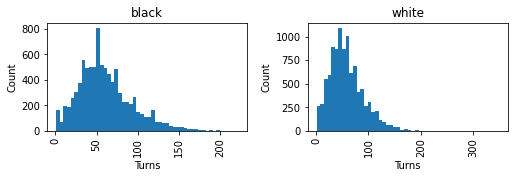

In [46]:
win_turn = win.turns.hist(by=win['winner'], bins=50, figsize=(8,2))
for axis in win_turn.flatten():
    axis.set_xlabel("Turns")    
    axis.set_ylabel("Count")    

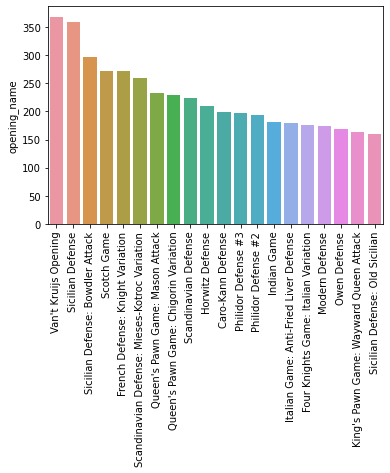

In [27]:
#barplot of most common openings
pd.set_option("display.max_rows", None, "display.max_columns", None)
counts = df.opening_name.value_counts()[:20]

plot = sns.barplot(x = counts.index, y = counts)
plot.set_xticklabels(plot.get_xticklabels(), rotation = 90)
plt.show()

<AxesSubplot:>

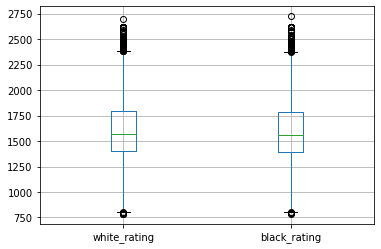

In [28]:
df.boxplot(column=['white_rating','black_rating'])

<AxesSubplot:title={'center':'white_rating'}, xlabel='winner'>

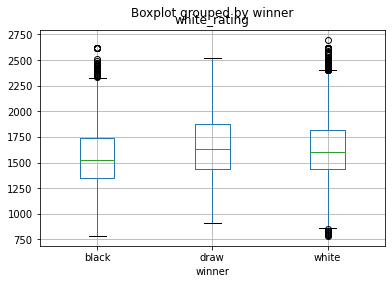

In [29]:
#df.boxplot(column=['white_rating', 'black_rating'], by='winner')
df.boxplot(column='white_rating', by='winner')

<AxesSubplot:xlabel='winner', ylabel='white_rating'>

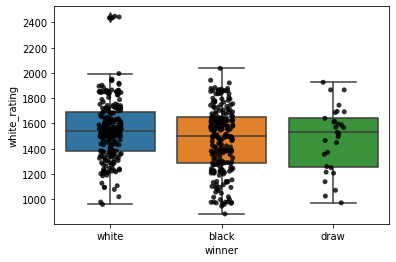

In [30]:
sns.boxplot(x='winner', y='white_rating', data=df.iloc[:500, :])
sns.stripplot(x='winner', y='white_rating', data=df.iloc[:500, :],
                jitter=True, marker='o', alpha=.8, color="black")

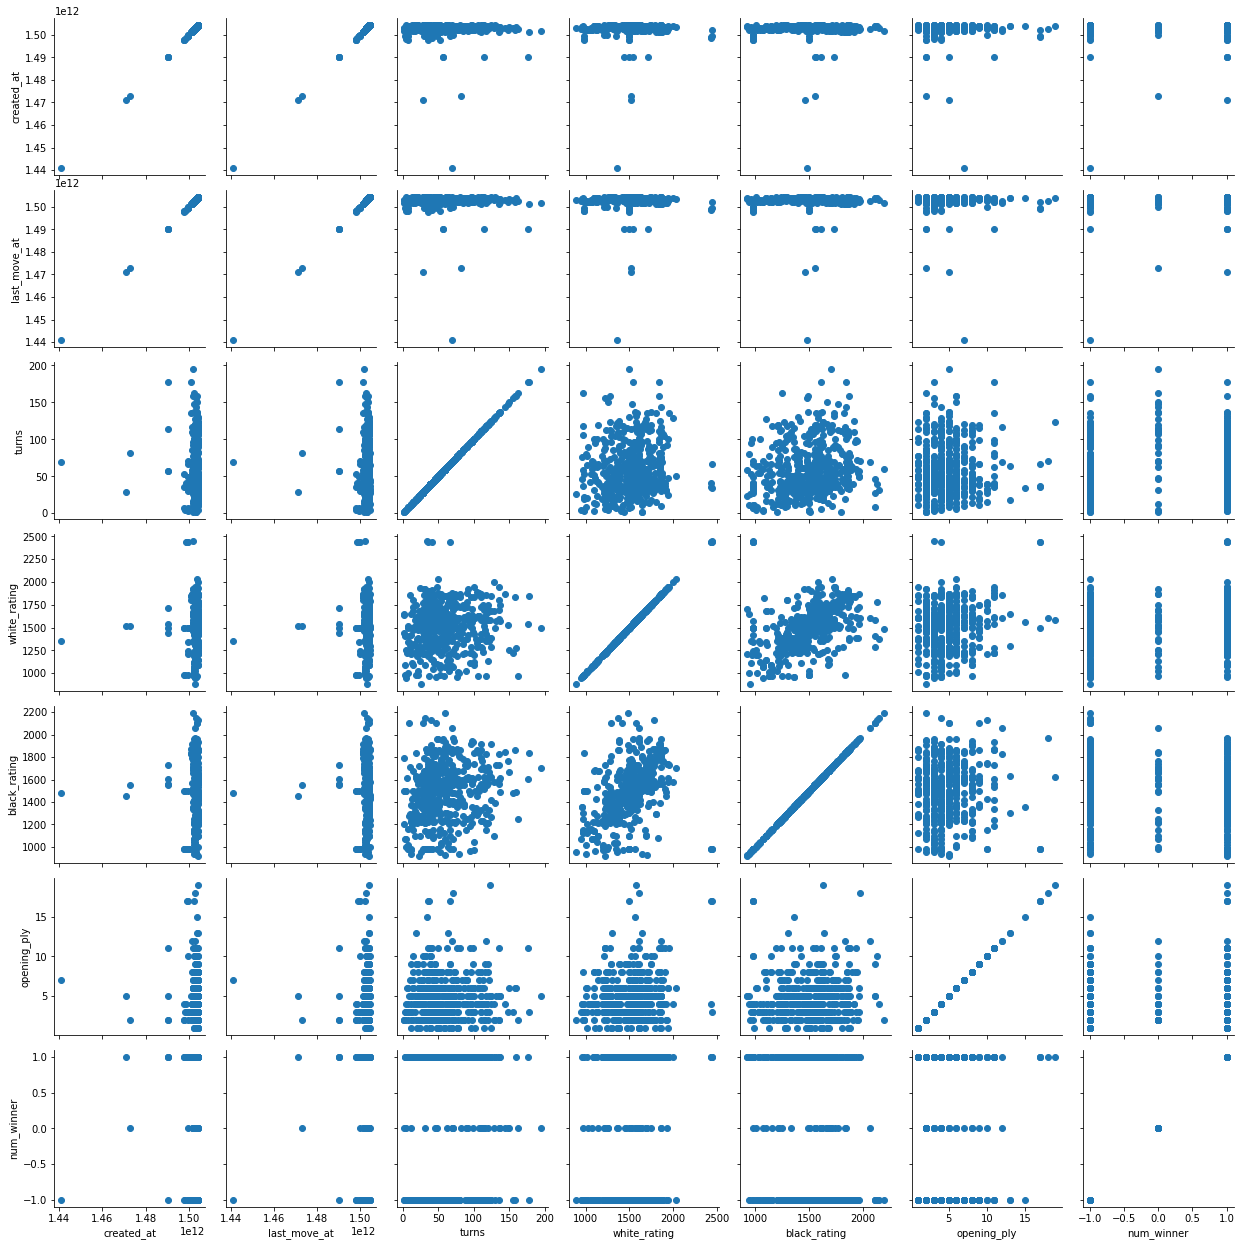

In [31]:
nums = df.select_dtypes(include=['number']).iloc[:500, :] #select all rows and only first few columns
sns.PairGrid(nums).map(plt.scatter)

In [32]:
print(pd.pivot_table(df, index=['rated'], values=['white_rating']))
print(pd.pivot_table(df, index=['rated'], values=['black_rating']))

       white_rating
rated              
False   1594.685883
True    1597.102012
       black_rating
rated              
False   1569.497310
True    1593.503188


In [33]:
print(pd.pivot_table(df, index=['winner'], values=['turns']))

            turns
winner           
black   60.724388
draw    86.157895
white   57.790221


In [35]:
opening_ecoValue_counts = pd.DataFrame(df.opening_eco.value_counts())
multiplePlayOpenings = opening_ecoValue_counts[opening_ecoValue_counts.opening_eco >= 20]
rowsWithValidOpenings = df[df.opening_eco.isin(multiplePlayOpenings.index)]
openingRatingAvg = pd.DataFrame(pd.pivot_table(rowsWithValidOpenings, index=['opening_eco'], values=['white_rating']))
print(openingRatingAvg.sort_values(by='white_rating', ascending=False))

             white_rating
opening_eco              
A08           1915.076923
E10           1883.350000
A84           1835.500000
B43           1826.896552
B72           1825.400000
B53           1821.714286
B33           1810.666667
B18           1807.218750
C67           1807.206897
A85           1802.034483
D45           1799.518519
D12           1795.592593
D43           1791.484848
D37           1779.884615
A49           1774.062500
B90           1772.376238
B11           1764.290323
B34           1761.484848
B13           1761.388235
E20           1758.454545
B03           1752.869565
A52           1752.375000
C78           1750.878788
A28           1749.416667
E61           1744.423729
A46           1741.240506
C66           1740.566667
A15           1737.250000
C11           1734.394737
D35           1733.069444
C69           1729.739130
A07           1726.909091
B22           1726.510638
B08           1725.931818
D15           1723.659574
D11           1721.463415
B15         

<AxesSubplot:>

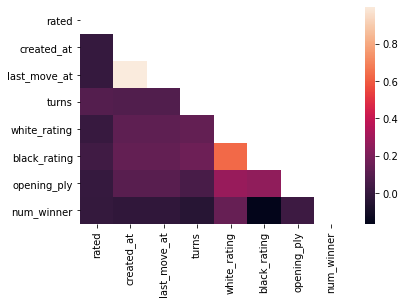

In [36]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) 
sns.heatmap(corr, mask=mask)

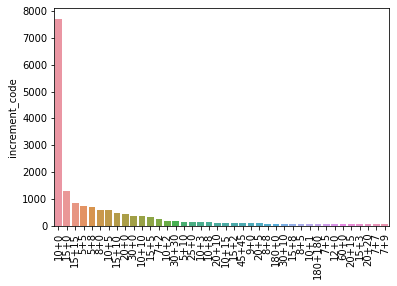

In [37]:
vc = df['increment_code'].value_counts()[:40]
chart = sns.barplot(x=vc.index, y=vc)
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [38]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply',
       'num_winner'],
      dtype='object')

graph for id


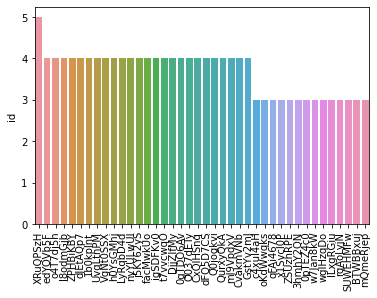

graph for rated


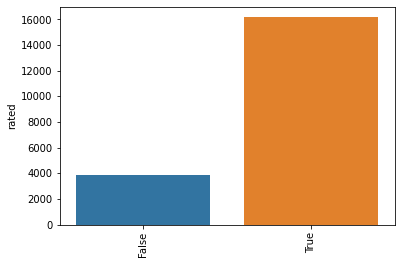

graph for turns


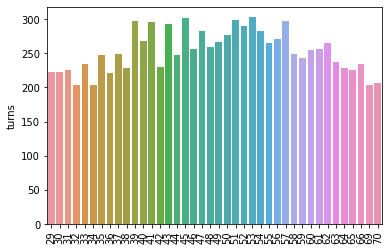

graph for victory_status


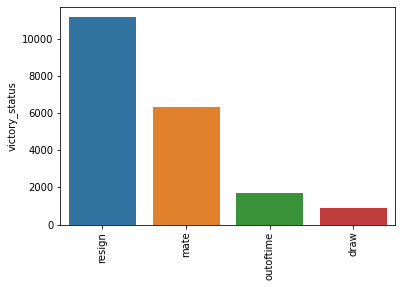

graph for winner


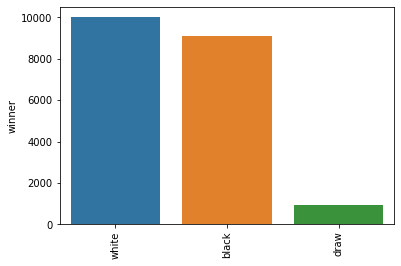

graph for increment_code


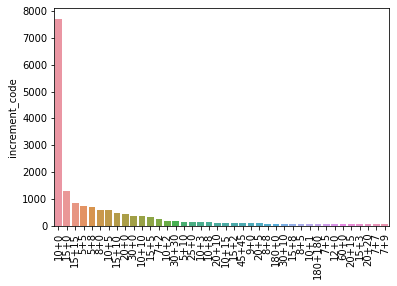

graph for opening_name


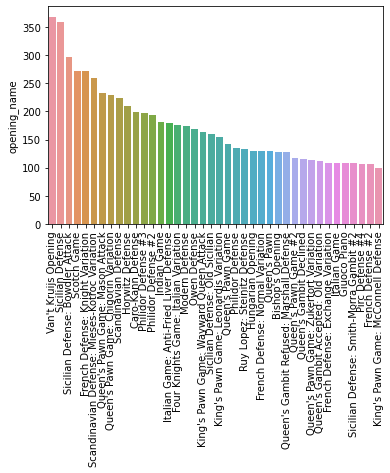

graph for white_rating


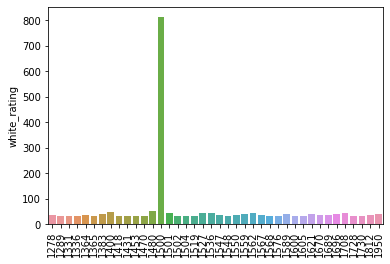

graph for black_rating


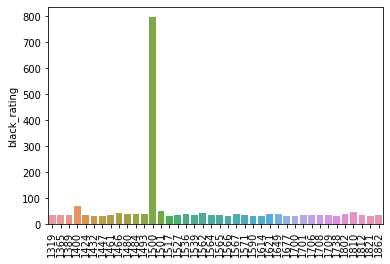

In [39]:
df_cats = df[['id', 'rated', 'turns', 'victory_status', 'winner', 'increment_code', 'opening_name',
              'white_rating', 'black_rating']]
for i in df_cats.columns:
    cat_num = df_cats[i].value_counts()[:40]
    print(f"graph for {i}")
    chart = sns.barplot(x = cat_num.index, y = cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

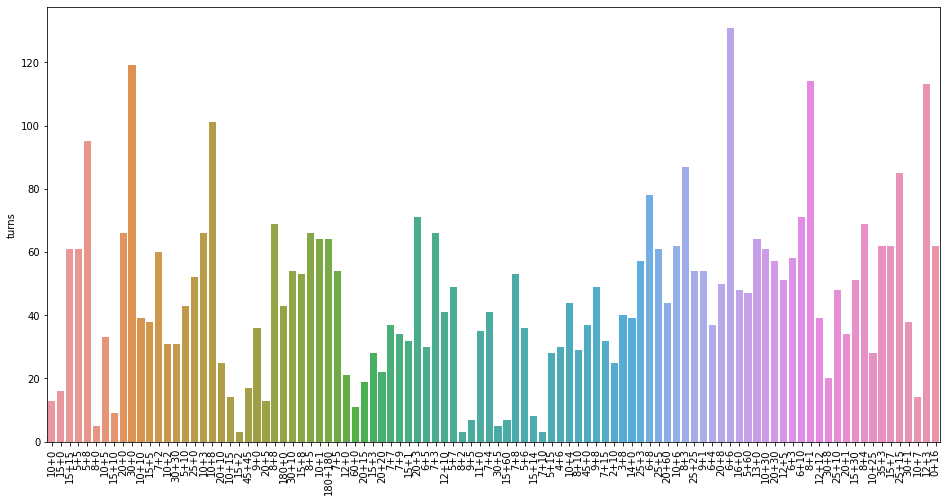

In [40]:
#turns vs increment
plt.figure(figsize=(16,8))
chart = sns.barplot(x = df.increment_code.value_counts()[:100].index, y = df.turns[:100])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

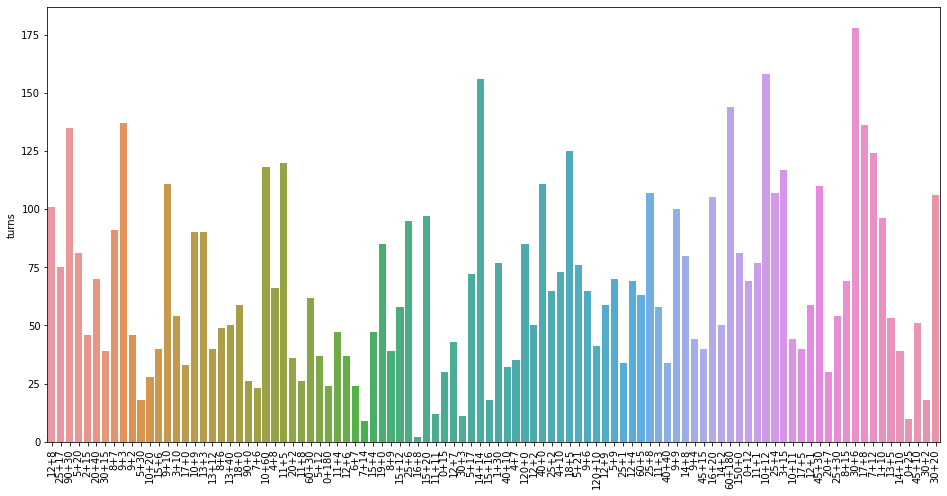

In [41]:
plt.figure(figsize=(16,8))
chart = sns.barplot(x = df.increment_code.value_counts()[100:200].index, y = df.turns[100:200])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

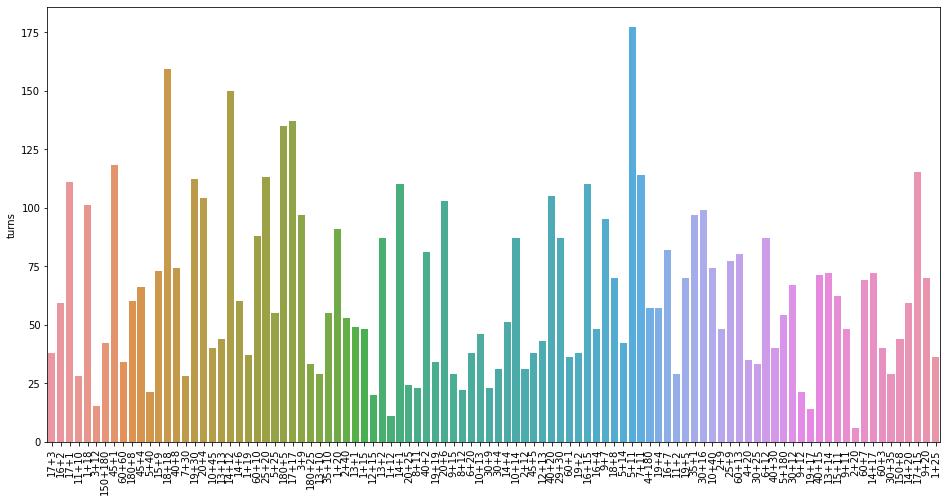

In [42]:
plt.figure(figsize=(16,8))
chart = sns.barplot(x = df.increment_code.value_counts()[200:300].index, y = df.turns[200:300])
chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

In [43]:
#check number of different increment codes
ics = pd.DataFrame(list(set(df.increment_code.values)))
print(len(ics))

400


In [44]:
pd.set_option('display.max_rows', 15)
pt_ic_turns = pd.DataFrame(pd.pivot_table(df, index=['increment_code'], values=['turns']))
pt_ic_turns.sort_values(by='turns', ascending=False)

,turns
increment_code,
20+11,151.000000
16+1,137.000000
90+120,125.000000
120+5,118.000000
14+6,112.333333
...,...
40+20,6.000000
11+7,5.000000
30+60,3.000000
